In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline


#### About the dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [2]:
data_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'

### Load Data From CSV File

In [3]:
df=pd.read_csv(data_url)

In [4]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
#Let’s see how many of each class is in our data set
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f342b8d1f50>]],
      dtype=object)

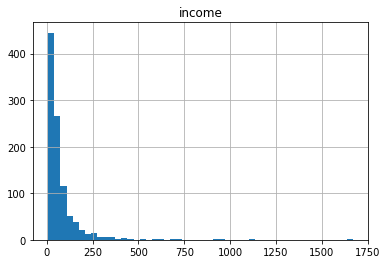

In [6]:
df.hist(column='income' ,bins=50)

### Feature set

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [9]:
#Dependent variable
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## Normalize Data


In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
k=1
knn=KNeighborsClassifier(n_neighbors = k)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Value for K

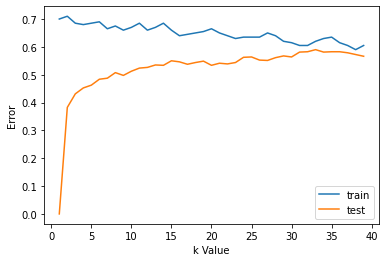

In [15]:
error1=[]
error2=[]

for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)
  pred=knn.predict(X_test)
  error1.append(np.mean(pred!=y_test))
  pred1=knn.predict(X_train)
  error2.append(np.mean(pred1!=y_train))

 

plt.plot(range(1,40),error1,label="train")
plt.plot(range(1,40),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()


### Training

Lets start the algorithm with k=10 for now:

In [27]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

## Predicting

In [28]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 3, 2, 4])

## Accuracy evaluation

In [29]:

from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.33


## Thank You!!

####   Please Share Your feedback

##### Author:Umakant Yadav